<a href="https://colab.research.google.com/github/rb05751/SVM-Application---Acute-Inflammations-Dataset/blob/master/ML_Acute_Inflammations_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import tensorflow as tf
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
uploaded=files.upload()

Saving Acute Inflammations Data Set.csv to Acute Inflammations Data Set.csv


In [60]:
data = pd.read_csv('Acute Inflammations Data Set.csv')
data.head()

,Temp,Nausea Occurrence,Lumbar Pain,Urine Pushing,Micturition,Urethra Burn,Inflammation Decision,Nephritis of Renal Pelvis
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


In [61]:
#Removing the commas from the 'Temp' column
data['Temp'] = data.Temp.str.replace(',', '.')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
data['Temp'] = data['Temp'].apply(lambda x: x.strip())
data.head()

,Temp,Nausea Occurrence,Lumbar Pain,Urine Pushing,Micturition,Urethra Burn,Inflammation Decision,Nephritis of Renal Pelvis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [63]:
#Change No's and Yes's in all the columns (except temperature) to 1's and 0's:

for i in range(data.shape[0]):

  a = data.iloc[i, 1]
  b = data.iloc[i, 2]
  c = data.iloc[i, 3]
  d = data.iloc[i, 4]
  e = data.iloc[i, 5]
  f = data.iloc[i, 6]
  g = data.iloc[i, 7]

  if a == 'no':
    data.iloc[i, 1] = 0
  else:
    data.iloc[i, 1] = 1
  if b == 'no':
    data.iloc[i, 2] = 0
  else:
    data.iloc[i, 2] = 1
  if c == 'no':
    data.iloc[i, 3] = 0
  else:
    data.iloc[i, 3] = 1
  if d == 'no':
    data.iloc[i, 4] = 0
  else:
    data.iloc[i, 4] = 1
  if e == 'no':
    data.iloc[i, 5] = 0
  else:
    data.iloc[i, 5] = 1
  if f == 'no':
    data.iloc[i, 6] = 0
  else:
    data.iloc[i, 6] = 1
  if g == 'no':
    data.iloc[i, 7] = 0
  else:
    data.iloc[i, 7] = 1

# #Visualize changes to make sure they ocurred correctly
data.head()

,Temp,Nausea Occurrence,Lumbar Pain,Urine Pushing,Micturition,Urethra Burn,Inflammation Decision,Nephritis of Renal Pelvis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [65]:
#Normalize the dataset
X = data.drop(['Inflammation Decision', 'Nephritis of Renal Pelvis'], axis = 1).values
X = StandardScaler().fit(X).transform(X.astype(float))

#Compute PCA to retain 99% of the variance in the data
pca = PCA(0.99)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
X = np.asanyarray(X)
y = data.loc[:,['Inflammation Decision']].values
y = np.asanyarray(y)


#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_test, y_train, y_test = X_train.astype('int'), X_test.astype('int'), y_train.astype('int'), y_test.astype('int')
y_train = y_train.squeeze()
y_test = y_test.squeeze()
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (96, 6) (96,)
Test set: (24, 6) (24,)


In [66]:
#Instantiate the SVM, with kernel rbf (There are other kernel options but you will see that this one works just fine)
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

#Test model on the test set
yhat = clf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Confusion matrix, without normalization
[[11  0]
 [ 0 13]]
Jaccard Similarity:  1.0
F1_score:  1.0


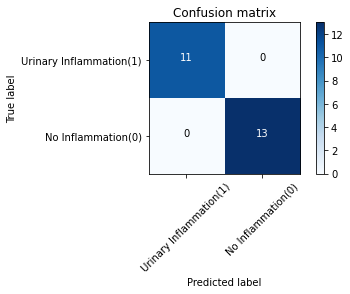

In [67]:
#Plot a confusion matrix to visualize accuracy which is 100% in this case.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Urinary Inflammation(1)','No Inflammation(0)'],normalize= False,  title='Confusion matrix')

#Print Accuracy Scores
print('Jaccard Similarity: ', jaccard_score(y_test, yhat))
print('F1_score: ', f1_score(y_test, yhat, average='weighted'))

In [68]:
#Visualize the correct predictions in a dataframe
test = pd.DataFrame(data = yhat , columns = ['Test Predictions'])
test['Ground Truth Labels'] = y_test
test.head()

,Test Predictions,Ground Truth Labels
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0


In [69]:
X = data.drop(['Nephritis of Renal Pelvis'], axis = 1).values
X = StandardScaler().fit(X).transform(X.astype(float))
X = np.asanyarray(X)
y = data.loc[:,['Nephritis of Renal Pelvis']].values
y = np.asanyarray(y)

#Compute PCA to retain 99% of the variance in the data
pca = PCA(0.99)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
X = np.asanyarray(X)

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_test, y_train, y_test = X_train.astype('int'), X_test.astype('int'), y_train.astype('int'), y_test.astype('int')
y_train = y_train.squeeze()
y_test = y_test.squeeze()
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (96, 7) (96,)
Test set: (24, 7) (24,)


In [70]:
#Instantiate the SVM, with kernel rbf (There are other kernel options but you will see that this one works just fine)
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

#Test model on the test set
yhat = clf.predict(X_test)

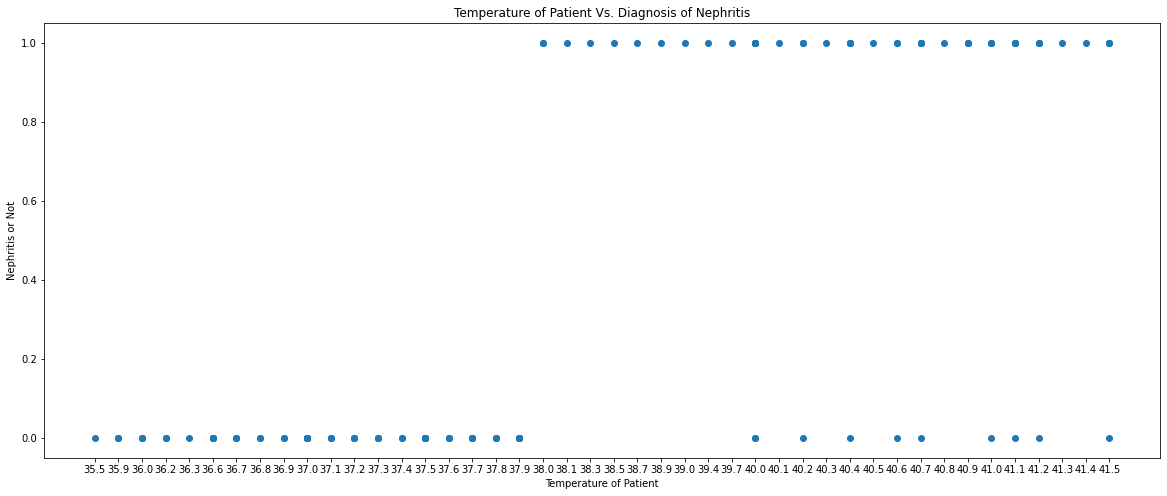

In [71]:
#Visualize the temperature of patient vs. Nephritis or not. You can easily see that it almost follows a logistic regression curve
#With the exception of a few outliers in the higher temperatures.
xaxis = data['Temp'].values
# yaxis = data['Nephritis of Renal Pelvis']
yaxis = data['Nephritis of Renal Pelvis']

plt.figure(figsize = (20,8))
plt.xlabel('Temperature of Patient')
plt.ylabel('Nephritis or Not')
plt.title('Temperature of Patient Vs. Diagnosis of Nephritis')
plt.scatter(x = xaxis, y = yaxis)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         9

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Confusion matrix, without normalization
[[ 9  0]
 [ 0 15]]


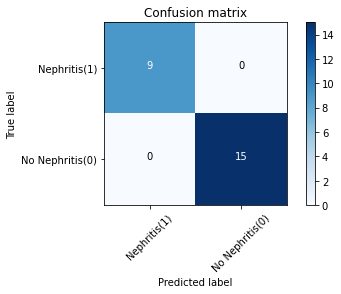

In [74]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Nephritis(1)','No Nephritis(0)'],normalize= False,  title='Confusion matrix')

In [75]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

print('Jaccard Similarity: ', jaccard_score(y_test, yhat))
print('F1_score: ', f1_score(y_test, yhat, average='weighted')) 

Jaccard Similarity:  1.0
F1_score:  1.0


In [77]:
test = pd.DataFrame(data = yhat , columns = ['Test Predictions'])
test.head()

,Test Predictions
0,0
1,0
2,0
3,0
4,0


In [78]:
test['Ground Truth Labels'] = y_test
test.head()

,Test Predictions,Ground Truth Labels
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


(array([15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

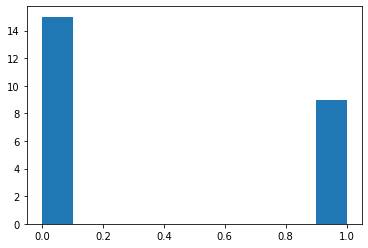

In [79]:
plt.hist(test['Test Predictions'])